# Plotting a White Noise Process

Suppose we wan to simulate and plot white noise process $\epsilon_0, \epsilon_1,...,\epsilon_T$, where each draw $\epsilon_t$ is independant standard normal.

We'll do this several ways.

## Version 1

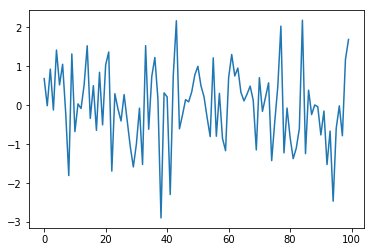

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
plt.plot(x)
plt.show()

In [2]:
np.sqrt(4)

2.0

In [3]:
import numpy
numpy.sqrt(4)

2.0

In [4]:
from numpy import sqrt
sqrt(4)

2.0

## Version 2

Another version that uses `for` loops and Python lists

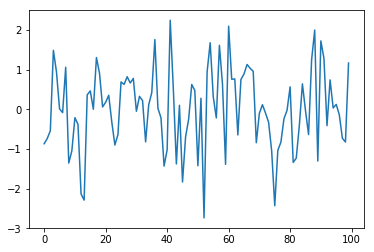

In [5]:
ts_length = 100
ε_values = []

for i in range(ts_length):
    e = np.random.randn()
    ε_values.append(e)
    
plt.plot(ε_values)
plt.show()

In [6]:
x = [10,'asd',False]
type(x)

list

In [7]:
x

[10, 'asd', False]

In [8]:
x.append(2.5)
x

[10, 'asd', False, 2.5]

In [9]:
x

[10, 'asd', False, 2.5]

In [10]:
x.pop()

2.5

In [11]:
x

[10, 'asd', False]

In [12]:
x[0]

10

In [13]:
x[1]

'asd'

In [14]:
animals =['dog','cat','bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal +"s.")

The plural of dog is dogs.
The plural of cat is cats.
The plural of bird is birds.


### While loops

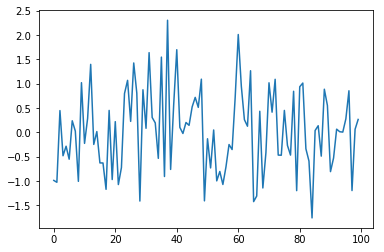

In [15]:
ts_length = 100
ε_values = []
i = 0

while i < ts_length:
    e = np.random.randn()
    ε_values.append(e)
    # i = i + 1
    i += 1
    
plt.plot(ε_values)
plt.show()

### User-defined functions

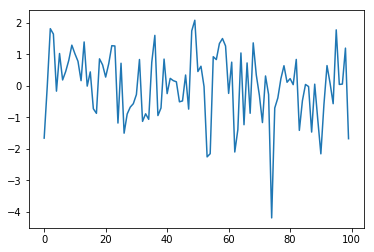

In [16]:
def generate_data(n):
    ε_values = []

    for i in range(ts_length):
        e = np.random.randn()
        ε_values.append(e)
        
    return ε_values

data = generate_data(100)
plt.plot(data)
plt.show()

### Conditons

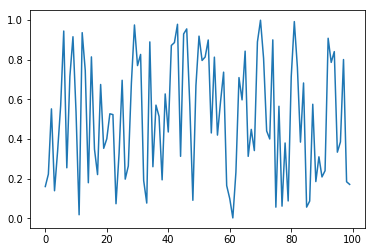

In [17]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        if generator_type == 'U':
            e = np.random.uniform()
        else:
            e = np.random.randn()
        
        ε_values.append(e)
        
    return ε_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

Passing a function insteadof a flag:

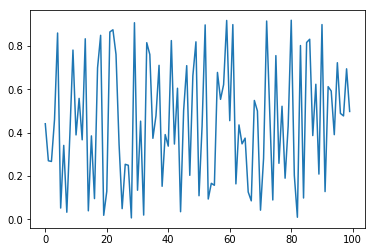

In [18]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        e = generator_type()
        ε_values.append(e)
        
    return ε_values

# data = generate_data(100, np.random.randn)
data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

In [19]:
max(2,7,5)

7

In [20]:
m = max
m(2,7,5)

7

### List Comprehensions

In [21]:
animals = ['dog','cat','bird']
plurals = [ animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

In [22]:
range(8)

range(0, 8)

So in python3, `range()` is lazy evaluated. In python2 it would have returned `[0,1,2,3,4,5,6,7]`
To force evaluation call `list(range())`

In [23]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [24]:
doubles = [ 2 * x for x in range(8)]

In [25]:
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

We can therefor simplify

In [26]:
def generate_data(n, generator_type):
    ε_values = []

    for i in range(ts_length):
        e = generator_type()
        ε_values.append(e)
        
    return ε_values



Into

In [27]:
def generate_data(n, generator_type):
    
    ε_values = [ generator_type() for i in range(n) ]

    return ε_values

## Excersises

#### Exercise 1

Recall that $n$! is read as “n factorial” and defined as $n!=n×(n−1)×⋯×2×1$

There are functions to compute this in various modules, but let’s write our own version as an exercise

In particular, write a function `factorial` such that `factorial(n)` returns $n$!
for any positive integer $n$

In [28]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
        
factorial(4)

24

#### Exercise 2

The binomial random variable $Y∼Bin(n,p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$

Without any import besides `from numpy.random import uniform`, write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$

Hint: If $U$
is uniform on (0,1) and $p$ ∈ (0,1), then the expression `U < p` evaluates to `True` with probability $p$

In [29]:
from numpy.random import uniform

def binomial(n,p):
    count = 0
    for i in range(n):
        u = uniform()
        if u < p:
            count = count + 1
            
    return count

binomial(100,0.5)
        

56

In [30]:
np.random.binomial(100,0.5)

48

In [31]:
binomial(100,0.2)

20

In [32]:
np.random.binomial(100,0.2)

24

#### Exercise 3

Compute an approximation to $\pi$

using Monte Carlo. Use no imports besides

```
import numpy as np
```

Your hints are as follows:

* If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$
* If $U_1,…,U_n$ are iid copies of $U$, then, as $n$ gets large, the fraction that fall in $B$ converges to the probability of landing in $B$
* For a circle, area = pi * radius^2

In [48]:
import numpy as np

def pi_approx(n):
    inCircle = 0
    r = 0.5
    for i in range(n):
        x = np.random.uniform() - 0.5
        y = np.random.uniform() - 0.5
        if np.sqrt(x**2 + y**2) < r:
            inCircle += 1
    
    # area = pi*0.5^2 = pi/4 => pi = area * 4
    pi = inCircle/n * 4
    return pi
    
    

In [49]:
pi_approx(3000000)

3.141448

#### Exercise 4

Write a program that prints one realization of the following random device:

* Flip an unbiased coin 10 times
* If 3 consecutive heads occur one or more times within this sequence, pay one dollar
* If not, pay nothing

Use no import besides `from numpy.random import uniform`

In [61]:
from numpy.random import uniform

tosses = []

for i in range(10):
    if uniform() < 0.5:
        tosses.append('H')
    else:
        tosses.append('T')
    
run = 0
for i in range(7):
    if tosses[i] == 'H' and tosses[i+1] == 'H' and tosses[i+2] == 'H':
        run +=1
       
print(tosses)

if run > 0:
    print(1)
else:
    print(0)

    
    

['T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H']
0


Solution from lecture:

In [66]:
from numpy.random import uniform

payoff = 0
count = 0

for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0
    if count == 3:
        payoff = 1

print(payoff)


1


#### Exercise 5

Your next task is to simulate and plot the correlated time series

$x_{t+1}=α x_t+ε_{t+1}$ where $x_0=0$ and $t=0,…,T$

The sequence of shocks ${ε_t}$

is assumed to be iid and standard normal

In your solution, restrict your import statements to

```
import numpy as np
import matplotlib.pyplot as plt
```

Set $T=200$
and $α=0.9$

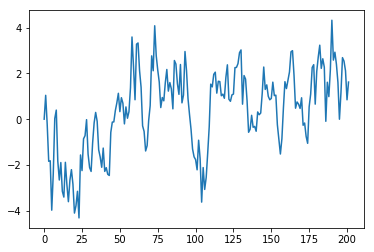

In [69]:
import numpy as numpy
import matplotlib.pyplot as plt

x_values = [0]
alpha = 0.9
T = 200

def value(x,n):
    e_value = np.random.normal()
    new_x = alpha*x + e_value
    x_values.append(new_x)
    if n == 200:
        return x_values
    else:
        return value(new_x, n+1)
    
series = value(0,0)
plt.plot(series)
plt.show()


Solution from lectures (better, doesn't blow up stack if $T$ large):

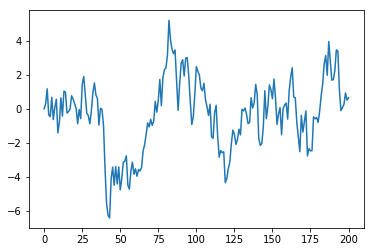

In [70]:
α = 0.9
ts_length = 200
current_x = 0

x_values = []
for i in range(ts_length + 1):
    x_values.append(current_x)
    current_x = α * current_x + np.random.randn()
plt.plot(x_values)
plt.show()

Results are similar.

#### Exercise 6

Starting with your solution to exercise 5, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98

All three graphs must be on the same graph

Use a for `loop` to step through the $α$ values

Important hints:

* If you call the `plot()` function multiple times before calling `show()`, all of the lines you produce will end up on the same figure

* And if you omit the argument `'b-'` to the plot function, Matplotlib will automatically select different colors for each line

* The expression `'foo' + str(42)` evaluates to `'foo42'`


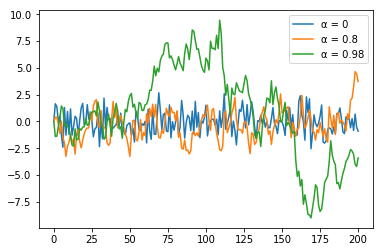

In [83]:
import numpy as numpy
import matplotlib.pyplot as plt

ts_length = 200

def series(alpha):
    x_values=[]
    current_x = 0

    for i in range(ts_length + 1):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    
    return x_values

for α in [0, 0.8, 0.98]:
    x_series = series(α)
    plot_label = "α = "+str(α)
    plt.plot(x_series, label = plot_label)
    
plt.legend()
plt.show()


Solution from lecture:

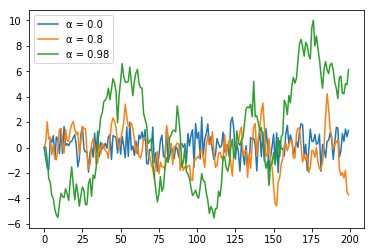

In [86]:
αs = [0.0, 0.8, 0.98]
ts_length = 200

for α in αs:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    plt.plot(x_values, label=f'α = {α}')
plt.legend()
plt.show()